# Coffee Shop Sales Analysis

## Introduction
This project analyzes a dataset of coffee shop sales to uncover trends, patterns, and insights into product performance and customer purchasing behavior. The dataset includes transaction-level data over six months, providing detailed information about:

- Products sold
- Store locations
- Transaction dates and times
- Pricing and sales quantities

By exploring this dataset, answers to key business questions will be proviede such as:
- What are the top-selling products?
- What times of day drive the highest sales?
- Are there any trends in pricing or product performance?
- How do sales vary across different store locations?

The goal is to use data visualization and statistical analysis to identify areas of high sales, highlight underperforming products, and suggest potential growth opportunities for the coffee shop.

---

## Data Source
The dataset used in this analysis is publicly available on Kaggle:
[Coffee Sales Dataset](https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales)

---

## Analysis Workflow
1. **Data Understanding**:
   - Exploring data types, unique values, and summary statistics.
2. **Data Visualization**:
   - Creating plots to identify patterns, trends, and outliers.
3. **Insights and Recommendations**:
   - Highlighting areas of high performance and growth opportunities.


### Importing libraries and Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Excel file
df = pd.read_excel('coffee_shop_sales.xlsx')

df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Dataset Overview

The dataset contains transaction-level data from a coffee shop, with a total of **149,116 entries** and **11 columns**. Below is the summary of the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
# the dataset contains no duplicates
df.duplicated().sum()

0

In [5]:
# Unique Values for Categorical Columns
categorical_columns = ['store_location', 'product_category', 'product_type', 'product_detail']
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}':")
    print(unique_values[:10])  


Unique values in 'store_location':
['Lower Manhattan' "Hell's Kitchen" 'Astoria']

Unique values in 'product_category':
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']

Unique values in 'product_type':
['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti']

Unique values in 'product_detail':
['Ethiopia Rg' 'Spicy Eye Opener Chai Lg' 'Dark chocolate Lg'
 'Our Old Time Diner Blend Sm' 'Oatmeal Scone' 'Columbian Medium Roast Sm'
 'Latte Rg' 'Dark chocolate Rg' 'Spicy Eye Opener Chai Rg' 'Ethiopia Lg']


In [6]:
# 3. Numerical Columns Descriptive Stats
numerical_columns = ['transaction_qty', 'unit_price']
numerical_stats = df[numerical_columns].describe()
print("\nNumerical Columns Descriptive Statistics:")
print(numerical_stats)


Numerical Columns Descriptive Statistics:
       transaction_qty     unit_price
count    149116.000000  149116.000000
mean          1.438276       3.382219
std           0.542509       2.658723
min           1.000000       0.800000
25%           1.000000       2.500000
50%           1.000000       3.000000
75%           2.000000       3.750000
max           8.000000      45.000000


In [7]:
# 4. Datetime Range
datetime_col = 'transaction_date'
if datetime_col in df.columns and pd.api.types.is_datetime64_any_dtype(df[datetime_col]):
    min_date = df[datetime_col].min()
    max_date = df[datetime_col].max()
    print(f"\nDate range for '{datetime_col}': {min_date} to {max_date}")
else:
    print(f"\n'{datetime_col}' is not a datetime column or is missing.")


Date range for 'transaction_date': 2023-01-01 00:00:00 to 2023-06-30 00:00:00


In [8]:
# df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# # Combine date and time for further analysis if needed
# df['datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'])

# Ensure 'transaction_date' is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Convert 'transaction_time' to string (if it's a datetime.time object)
df['transaction_time'] = df['transaction_time'].astype(str)

# Combine the date and time as strings and convert to datetime
df['datetime'] = pd.to_datetime(df['transaction_date'].dt.strftime('%Y-%m-%d') + ' ' + df['transaction_time'])



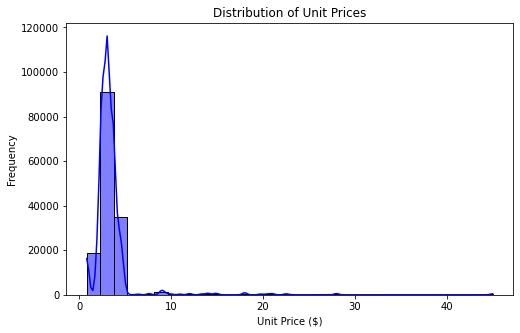

In [9]:
# 1. Histogram: Distribution of unit prices
plt.figure(figsize=(8, 5))
sns.histplot(df['unit_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Top-selling products by quantity
top_products = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False).head(10)


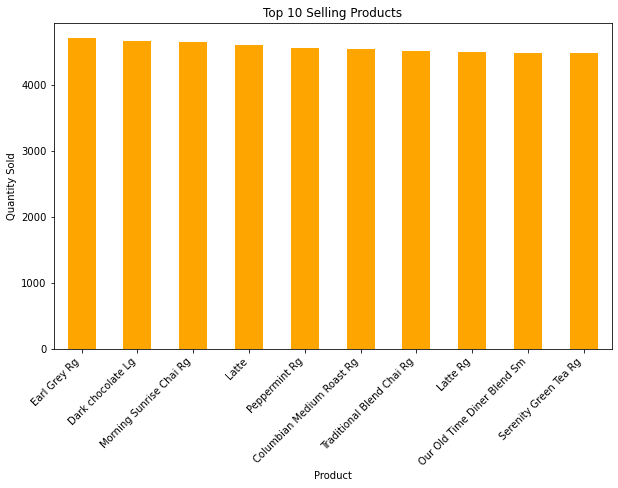

In [11]:
# Bar Chart: Top-selling products by quantity
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
# Sales by time of day
df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour
hourly_sales = df.groupby('hour')['transaction_qty'].sum()
hourly_sales

hour
6      6865
7     19449
8     25197
9     25370
10    26713
11    14035
12    12690
13    12439
14    12907
15    12923
16    12881
17    12700
18    10826
19     8595
20      880
Name: transaction_qty, dtype: int64

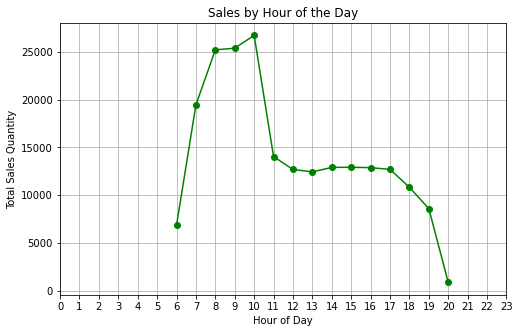

In [13]:
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='line', marker='o', color='green')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

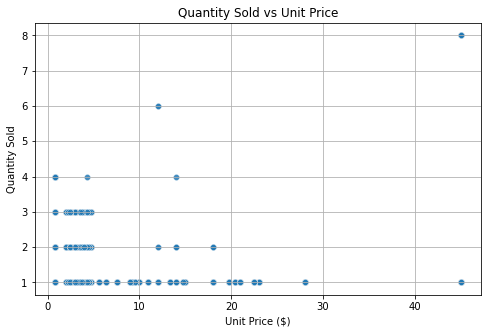

In [14]:
# Scatter Plot: Relationship between quantity sold and unit price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='unit_price', y='transaction_qty', data=df, alpha=0.6)
plt.title('Quantity Sold vs Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

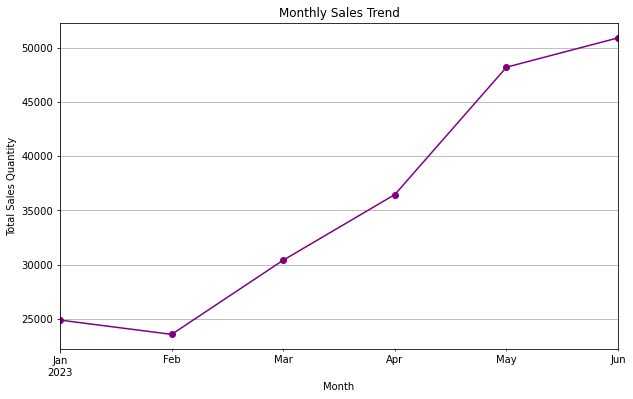

In [15]:
# Time-series Plot: Monthly sales trends
df['month'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['transaction_qty'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.grid()
plt.show()

In [16]:
# Insights:
# Top products
top_products_summary = top_products.reset_index(name='Total Quantity')
print("Top 10 Selling Products:")
print(top_products_summary)

Top 10 Selling Products:
                product_detail  Total Quantity
0                 Earl Grey Rg            4708
1            Dark chocolate Lg            4668
2      Morning Sunrise Chai Rg            4643
3                        Latte            4602
4                Peppermint Rg            4564
5    Columbian Medium Roast Rg            4547
6    Traditional Blend Chai Rg            4512
7                     Latte Rg            4497
8  Our Old Time Diner Blend Sm            4484
9        Serenity Green Tea Rg            4477


In [17]:
# High-sales hours
high_sales_hour = hourly_sales.idxmax()
print(f"Hour with the highest sales: {high_sales_hour}:00 with {hourly_sales.max()} sales.")

Hour with the highest sales: 10:00 with 26713 sales.


In [18]:
# Potential growth areas: Look for underperforming products or times
low_sales_hours = hourly_sales[hourly_sales < hourly_sales.mean()]
print("\nHours with below-average sales:")
print(low_sales_hours)


Hours with below-average sales:
hour
6      6865
11    14035
12    12690
13    12439
14    12907
15    12923
16    12881
17    12700
18    10826
19     8595
20      880
Name: transaction_qty, dtype: int64


In [19]:
# Correlation insights
correlation_matrix = df[['transaction_qty', 'unit_price']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 transaction_qty  unit_price
transaction_qty         1.000000   -0.123546
unit_price             -0.123546    1.000000
